In [47]:
from astropy import units as u
from astropy.time import Time
from astropy import time
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import *
from poliastro.twobody import Orbit
from poliastro.plotting import StaticOrbitPlotter
from poliastro.plotting.misc import plot_solar_system

EPOCH = Time("2007-11-12 12:00:00", scale="tdb")

2 x 5 AU x 19.1 deg (HeliocentricEclipticIAU76) orbit around Sun (☉) at epoch 2456880.5007775817 (TDB)

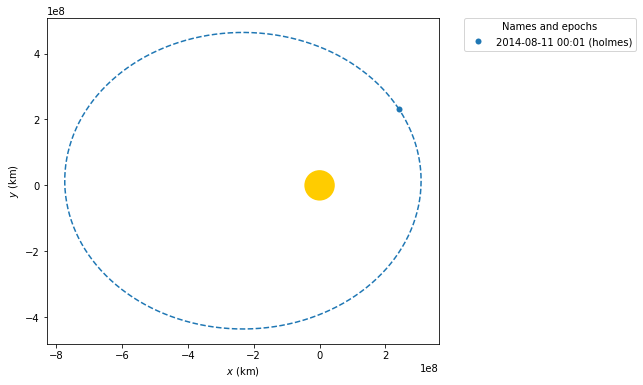

In [16]:
#sbdb is the 'small body database'
holmes = Orbit.from_sbdb("17P")
holmes.plot(label="holmes");
holmes.epoch.iso #this id the epoch given 

#to get another epoch, we have to propagate it ourselves
epoch = time.Time(2453820.075324074, scale="tdb", format="jd")
holmes_november = holmes.propagate(epoch)
holmes_november.epoch.iso
holmes #note: the inclination is w.r.t the ecliptic

In [17]:
holmes.inc

<Quantity 19.09176112 deg>

In [18]:
#downloading this gives access to another database 
#the advantage is that it gives more info (specific data) about comets and asteroids
# https://docs.poliastro.space/en/latest/api/safe/neos/dastcom5_parameters.html
dastcom5.download_dastcom5()
poliastro.neos.dastcom5.asteroid_db();

NameError: name 'dastcom5' is not defined

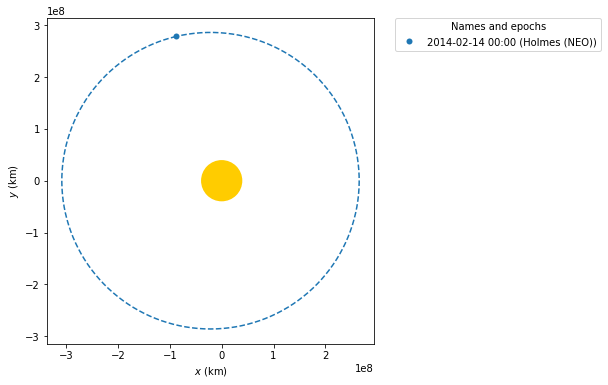

In [31]:
from poliastro.neos import dastcom5
holmes = dastcom5.orbit_from_name("holmes")[0]  # NEO

frame = StaticOrbitPlotter()
frame.plot(holmes, label="Holmes (NEO)")

In [21]:
ast_db = dastcom5.asteroid_db()
comet_db = dastcom5.comet_db()
comet_db.dtype.names;  #parameters of comet database 

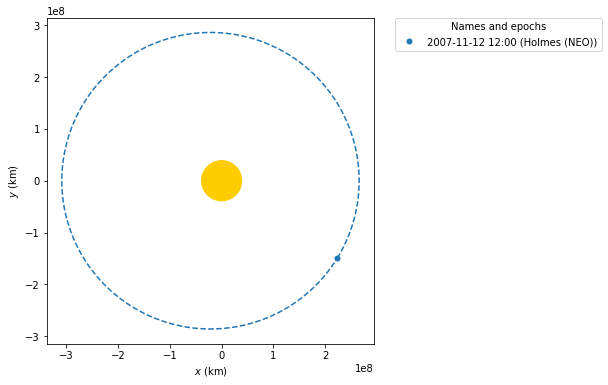

In [22]:
# we can compute the distance to the object
from poliastro.util import norm

holmes = holmes.propagate(EPOCH)
holmes.epoch.tdb.iso
frame = StaticOrbitPlotter()
frame.plot(holmes, label="Holmes (NEO)")

In [42]:
holmes.r

<Quantity [2.62823718e+07, 2.82437988e+08, 6.84605039e+07] km>

We want to use the ICRS (international celestial reference system) https://en.wikipedia.org/wiki/International_Celestial_Reference_System

In [33]:
holmes.to_icrs()

AttributeError: 'Orbit' object has no attribute 'to_icrs'

In [40]:
from poliastro.examples import iss
from astropy.coordinates import CartesianRepresentation, SphericalRepresentation

iss.represent_as(CartesianRepresentation)
holmes.represent_as(CartesianRepresentation)

#iss.represent_as(CartesianRepresentation).xyz

#iss.represent_as(CartesianRepresentation).differentials['s']

#iss.represent_as(CartesianRepresentation).differentials['s'].d_xyz

holmes.represent_as(SphericalRepresentation)


<SphericalRepresentation (lon, lat, distance) in (rad, rad, km)
    (1.47800817, 0.23681971, 2.91802709e+08)>

In [36]:
iss.to_icrs()

AttributeError: 'Orbit' object has no attribute 'to_icrs'

In [23]:
from poliastro.util import norm

earth = Orbit.from_body_ephem(Earth, EPOCH)
earth

/Users/anahoban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Orbit.from_body_ephem is deprecated and will be removed in a future release, use Ephem.from_body instead
  This is separate from the ipykernel package so we can avoid doing imports until


1 x 1 AU x 23.4 deg (ICRS) orbit around Sun (☉) at epoch 2008-09-01 12:05:50.000 (TDB)

In [15]:
norm(holmes.r - earth.r) - Earth.R

<Quantity 3.13609757e+08 km>

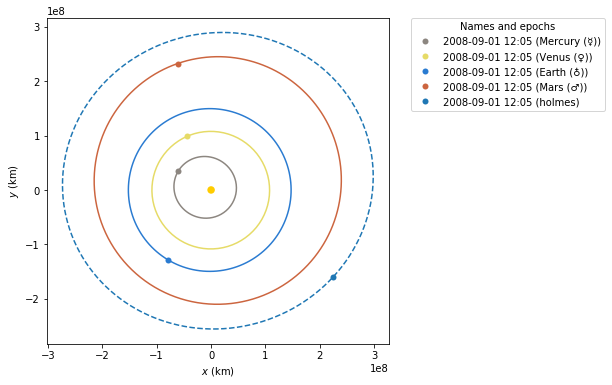

In [16]:
frame = plot_solar_system(outer=False, epoch=EPOCH)
frame.plot(holmes, label="holmes");

In [24]:
holmes_hyper = holmes.change_attractor(Earth, force=True)
#force true leaves sun as attractor, this is just to view the comet from the earth

/Users/anahoban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PatchedConicsWarning: Leaving the SOI of the current attractor
  """Entry point for launching an IPython kernel.


In [26]:
holmes_hyper #relative to earth

282428683 x -282429414 km x 10.3 deg (GCRS) orbit around Earth (♁) at epoch 2454711.004050926 (TDB)

In [25]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

# Astropy time

In [27]:
#requirement: pip install jplephem

In [28]:
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon

In [29]:
solar_system_ephemeris.set('de432s') 

<ScienceState solar_system_ephemeris: 'de432s'>

In [33]:
solar_system_ephemeris.bodies

('sun',
 'mercury',
 'venus',
 'earth-moon-barycenter',
 'earth',
 'moon',
 'mars',
 'jupiter',
 'saturn',
 'uranus',
 'neptune',
 'pluto')

In [57]:
from astropy import units as u
import astropy.coordinates
from astropy.coordinates import SkyCoord

In [12]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')
hcg7_center.transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>

In [63]:
from poliastro.coordinates import body_centered_to_icrs
solar_system_ephemeris.set("jpl")

ModuleNotFoundError: No module named 'poliastro.coordinates'

In [65]:
poliastro.inertial_body_centered_to_pqw(holmes.r, holmes.v, Sun)

AttributeError: module 'poliastro' has no attribute 'inertial_body_centered_to_pqw'

In [7]:
from datetime import datetime
from astropy.time import Time

In [8]:
def date2julian(date_string):
    date = datetime.strptime(date_string, "%Y:%m:%d  %H:%M:%S").strftime("%Y-%m-%dT%H:%M:%S")
    julian = Time(date, format='isot', scale='utc').jd
    return julian

t_min = date2julian("2007:07:02  00:00:00") #july 1st 2007
t_max = date2julian("2008:05:01  00:00:00") #may 1st 2008
print(t_min, t_max)


2454283.5 2454587.5
